# 0. Install and Import dependencies

In [4]:
# # Install TensorFlow-GPU (version 1.15.0)
# !pip install tensorflow-gpu

# Install TensorFlow (version 1.15.0)
!pip install tensorflow

# Install stable-baselines
!pip install stable-baselines

# Install gym-anytrading
!pip install gym-anytrading

# Install gym
!pip install gym


ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==1.15.0 (from versions: 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==1.15.0
ERROR: Could not find a version that satisfies the requirement tensorflow==1.15.0 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0)
ERROR: No matching distribution found for tensorflow==1.15.0


     ---------------------------------------- 0.0/240.9 kB ? eta -:--:--
     - -------------------------------------- 10.2/240.9 kB ? eta -:--:--
     - -------------------------------------- 10.2/240.9 kB ? eta -:--:--
     ------ ------------------------------ 41.0/240.9 kB 281.8 kB/s eta 0:00:01
     ---------------------- ------------- 153.6/240.9 kB 919.0 kB/s eta 0:00:01
     -------------------------------------- 240.9/240.9 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/721.7 kB ? eta -:--:--
     --------------- ---------------------- 286.7/721.7 kB 6.0 MB/s eta 0:00:01
     -------------------------------------- 721.7/721.7 kB 7.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): fini

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [77 lines of output]
      
      
      WARNING, No "Setup" File Exists, Running "buildconfig/config.py"
      Using WINDOWS configuration...
      
      Making dir :prebuilt_downloads:
      Downloading... https://www.libsdl.org/release/SDL2-devel-2.0.16-VC.zip 13d952c333f3c2ebe9b7bc0075b4ad2f784e7584
      Unzipping :prebuilt_downloads\SDL2-devel-2.0.16-VC.zip:
      Downloading... https://www.libsdl.org/projects/SDL_image/release/SDL2_image-devel-2.0.5-VC.zip 137f86474691f4e12e76e07d58d5920c8d844d5b
      Unzipping :prebuilt_downloads\SDL2_image-devel-2.0.5-VC.zip:
      Downloading... https://www.libsdl.org/projects/SDL_ttf/release/SDL2_ttf-devel-2.0.15-VC.zip 1436df41ebc47ac36e02ec9bda5699e80ff9bd27
      Unzipping :prebuilt_downloads\SDL2_ttf-devel-2.0.15-VC.zip:
      Downloading... https://www.libsdl.org/projects/SDL_mixer/release/SDL2_mixer-devel-2.0.4-VC.zi

^C
  Obtaining dependency information for gym-anytrading from https://files.pythonhosted.org/packages/31/97/1c92ae872371577fb4e732ec1365775fa12ce2865233909b5d10dc4f19df/gym_anytrading-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for gymnasium>=0.29.1 from https://files.pythonhosted.org/packages/a8/4d/3cbfd81ed84db450dbe73a89afcd8bc405273918415649ac6683356afe92/gymnasium-0.29.1-py3-none-any.whl.metadata
  Obtaining dependency information for numpy>=1.16.4 from https://files.pythonhosted.org/packages/93/fd/3f826c6d15d3bdcf65b8031e4835c52b7d9c45add25efa2314b53850e1a2/numpy-1.26.0-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-1.26.0-cp311-cp311-win_amd64.whl.metadata (61 kB)
  Obtaining dependency information for pandas>=0.24.2 from https://files.pythonhosted.org/packages/2d/5e/9213ea10ac473e2437dc2cb17323ddc0999997e2713d6a0b683b10773994/pandas-2.1.1-cp311-cp311-win_amd64.whl.metadata
  Using cached pandas-2.1.1-cp311-cp311-win_amd64.whl.metadata (18 kB)
  O

In [13]:
# Gym stuff
import gymnasium as gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 1. Bring in Marketwatch GME Data 
https://www.marketwatch.com/investing/stock/gme/download-data?startDate=11/1/2019&endDate=03/12/2021

In [7]:
df = pd.read_csv('data/gmedata.csv')

In [8]:
df.head()

,Date,Open,High,Low,Close,Volume
0,03/12/2021,275.00,295.50,262.27,264.5,"25,845,900"
1,03/11/2021,241.64,281.50,232.60,260.0,"28,312,490"
2,03/10/2021,269.43,348.50,172.00,265.0,"71,570,570"
3,03/09/2021,217.71,249.85,208.51,246.9,"39,099,328"
4,03/08/2021,154.89,210.87,146.10,194.5,"63,565,621"


In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [10]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-12,275.00,295.50,262.27,264.5,"25,845,900"
2021-03-11,241.64,281.50,232.60,260.0,"28,312,490"
2021-03-10,269.43,348.50,172.00,265.0,"71,570,570"
2021-03-09,217.71,249.85,208.51,246.9,"39,099,328"
2021-03-08,154.89,210.87,146.10,194.5,"63,565,621"


In [14]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)

In [16]:
env.unwrapped.signal_features  

array([[ 2.6450e+02,  0.0000e+00],
       [ 2.6000e+02, -4.5000e+00],
       [ 2.6500e+02,  5.0000e+00],
       [ 2.4690e+02, -1.8100e+01],
       [ 1.9450e+02, -5.2400e+01],
       [ 1.3774e+02, -5.6760e+01],
       [ 1.3235e+02, -5.3900e+00],
       [ 1.2418e+02, -8.1700e+00],
       [ 1.1818e+02, -6.0000e+00],
       [ 1.2040e+02,  2.2200e+00],
       [ 1.0174e+02, -1.8660e+01],
       [ 1.0873e+02,  6.9900e+00],
       [ 9.1710e+01, -1.7020e+01],
       [ 4.4970e+01, -4.6740e+01],
       [ 4.6000e+01,  1.0300e+00],
       [ 4.0590e+01, -5.4100e+00],
       [ 4.0690e+01,  1.0000e-01],
       [ 4.5940e+01,  5.2500e+00],
       [ 4.9510e+01,  3.5700e+00],
       [ 5.2400e+01,  2.8900e+00],
       [ 5.1100e+01, -1.3000e+00],
       [ 5.1200e+01,  1.0000e-01],
       [ 5.0310e+01, -8.9000e-01],
       [ 6.0000e+01,  9.6900e+00],
       [ 6.3770e+01,  3.7700e+00],
       [ 5.3500e+01, -1.0270e+01],
       [ 9.2410e+01,  3.8910e+01],
       [ 9.0000e+01, -2.4100e+00],
       [ 2.2500e+02,

# 2. Build Environment

In [17]:
env.action_space

Discrete(2)

info {'total_reward': -27.460006713867188, 'total_profit': 0.7748260181907846, 'position': <Positions.Short: 0>}


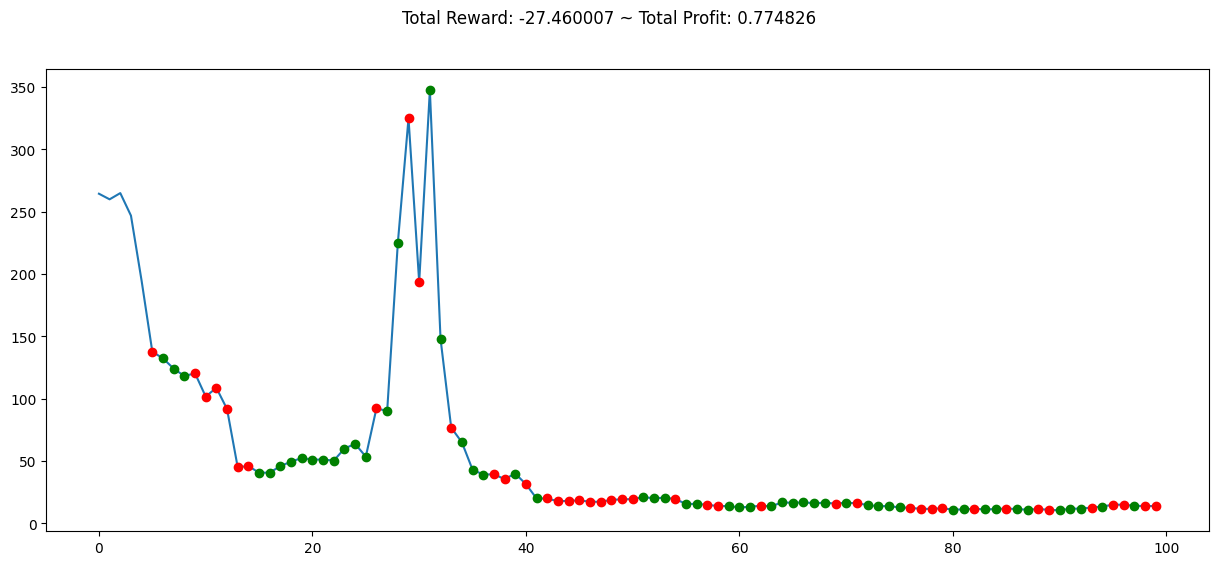

In [26]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    array_, n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.unwrapped.render_all()
plt.show()

# 3. Build Environment and Train

In [104]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [29]:
model = A2C('MlpPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 471      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.658   |
|    explained_variance | 0.0067   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -8.92    |
|    value_loss         | 622      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 501      |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.651   |
|    explained_variance | 0.253    |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | -0.537   |
|    value_loss      

In [111]:
env.step(action)

(array([[11.57,  0.66],
        [10.75, -0.82],
        [10.47, -0.28],
        [11.73,  1.26],
        [11.82,  0.09]], dtype=float32),
 0,
 False,
 False,
 {'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Long: 1>})

# 4. Evaluation

In [114]:
env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
obs_init = env.reset()

while True: 
    obs = np.reshape(obs_init[0], (5, 2))
    action, _states = model.predict(obs)
    obs, n_state, reward, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 0.0, 'total_profit': 0.794422284845212, 'position': <Positions.Long: 1>}


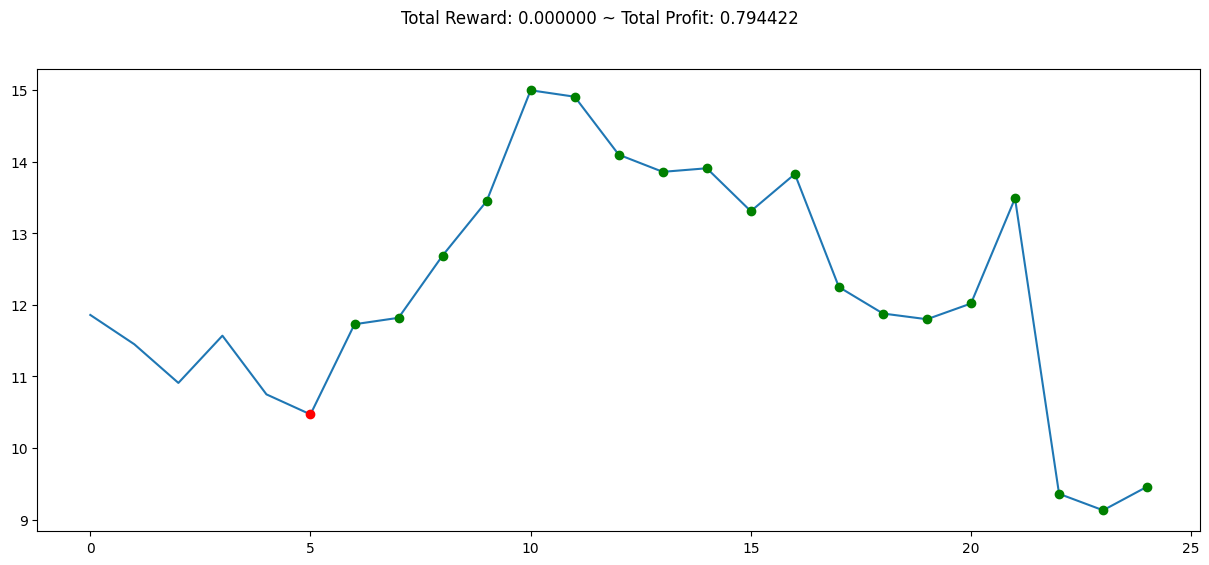

In [116]:
plt.figure(figsize=(15,6))
plt.cla()
env.unwrapped.render_all()
plt.show()